<a href="https://colab.research.google.com/github/mahmoudmagdyhassan/Mahmoud-/blob/main/car_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv("/content/train-data.csv")
df.head(2)

In [5]:
df.drop('Unnamed: 0' , axis =1 , inplace = True )
df.drop('Name', axis=1, inplace=True)

In [293]:
round((df.isna().mean()*100),2)

Location             0.00
Year                 0.00
Kilometers_Driven    0.00
Fuel_Type            0.00
Transmission         0.00
Owner_Type           0.00
Mileage              0.03
Engine               0.60
Power                0.60
Seats                0.70
New_Price           86.31
Price                0.00
dtype: float64

In [6]:
df.drop("New_Price", axis=1,inplace=True)


In [327]:
df['Mileage']

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 6019, dtype: object

In [7]:
df['Mileage'] = df['Mileage'].str.rstrip(' km/kg')
df['Mileage'] = df['Mileage'].str.rstrip(' kmpl')



In [8]:
df['Engine'] = df['Engine'].str.rstrip(' CC')
df['Power'] = df['Power'].str.rstrip(' bhp')

In [9]:
df['Mileage'] = df['Mileage'].astype('float')
df['Engine'] = df['Engine'].astype('float')
df['Power']= df['Engine'].astype('float')

In [331]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.00,6019.00,6017.00,5983.00,5983.00,5977.00,6019.00
mean,2013.36,58738.38,18.13,1621.28,1621.28,5.28,9.48
std,3.27,91268.84,4.58,601.36,601.36,0.81,11.19
min,1998.00,171.00,0.00,72.00,72.00,0.00,0.44
25%,2011.00,34000.00,15.17,1198.00,1198.00,5.00,3.50
50%,2014.00,53000.00,18.15,1493.00,1493.00,5.00,5.64
75%,2016.00,73000.00,21.10,1984.00,1984.00,5.00,9.95
max,2019.00,6500000.00,33.54,5998.00,5998.00,10.00,160.00


In [25]:
df.describe(include='object')

,Location,Fuel_Type,Transmission,Owner_Type
count,6019,6019,6019,6019
unique,11,5,2,4
top,Mumbai,Diesel,Manual,First
freq,790,3205,4299,4929


In [26]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

In [27]:
def colpie (col ):
    fig = px.pie(data_frame = df , names = col)
    fig.show()

In [28]:
colpie('Location')

In [29]:
colpie('Fuel_Type')


In [30]:
colpie('Transmission')


In [31]:
colpie('Owner_Type')

In [32]:
num_cols = df.select_dtypes(exclude = 'O').columns.tolist()
num_cols

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

In [ ]:
for col in num_cols:
    print(df[col].value_counts())
    print('------------------------------------------------------------')

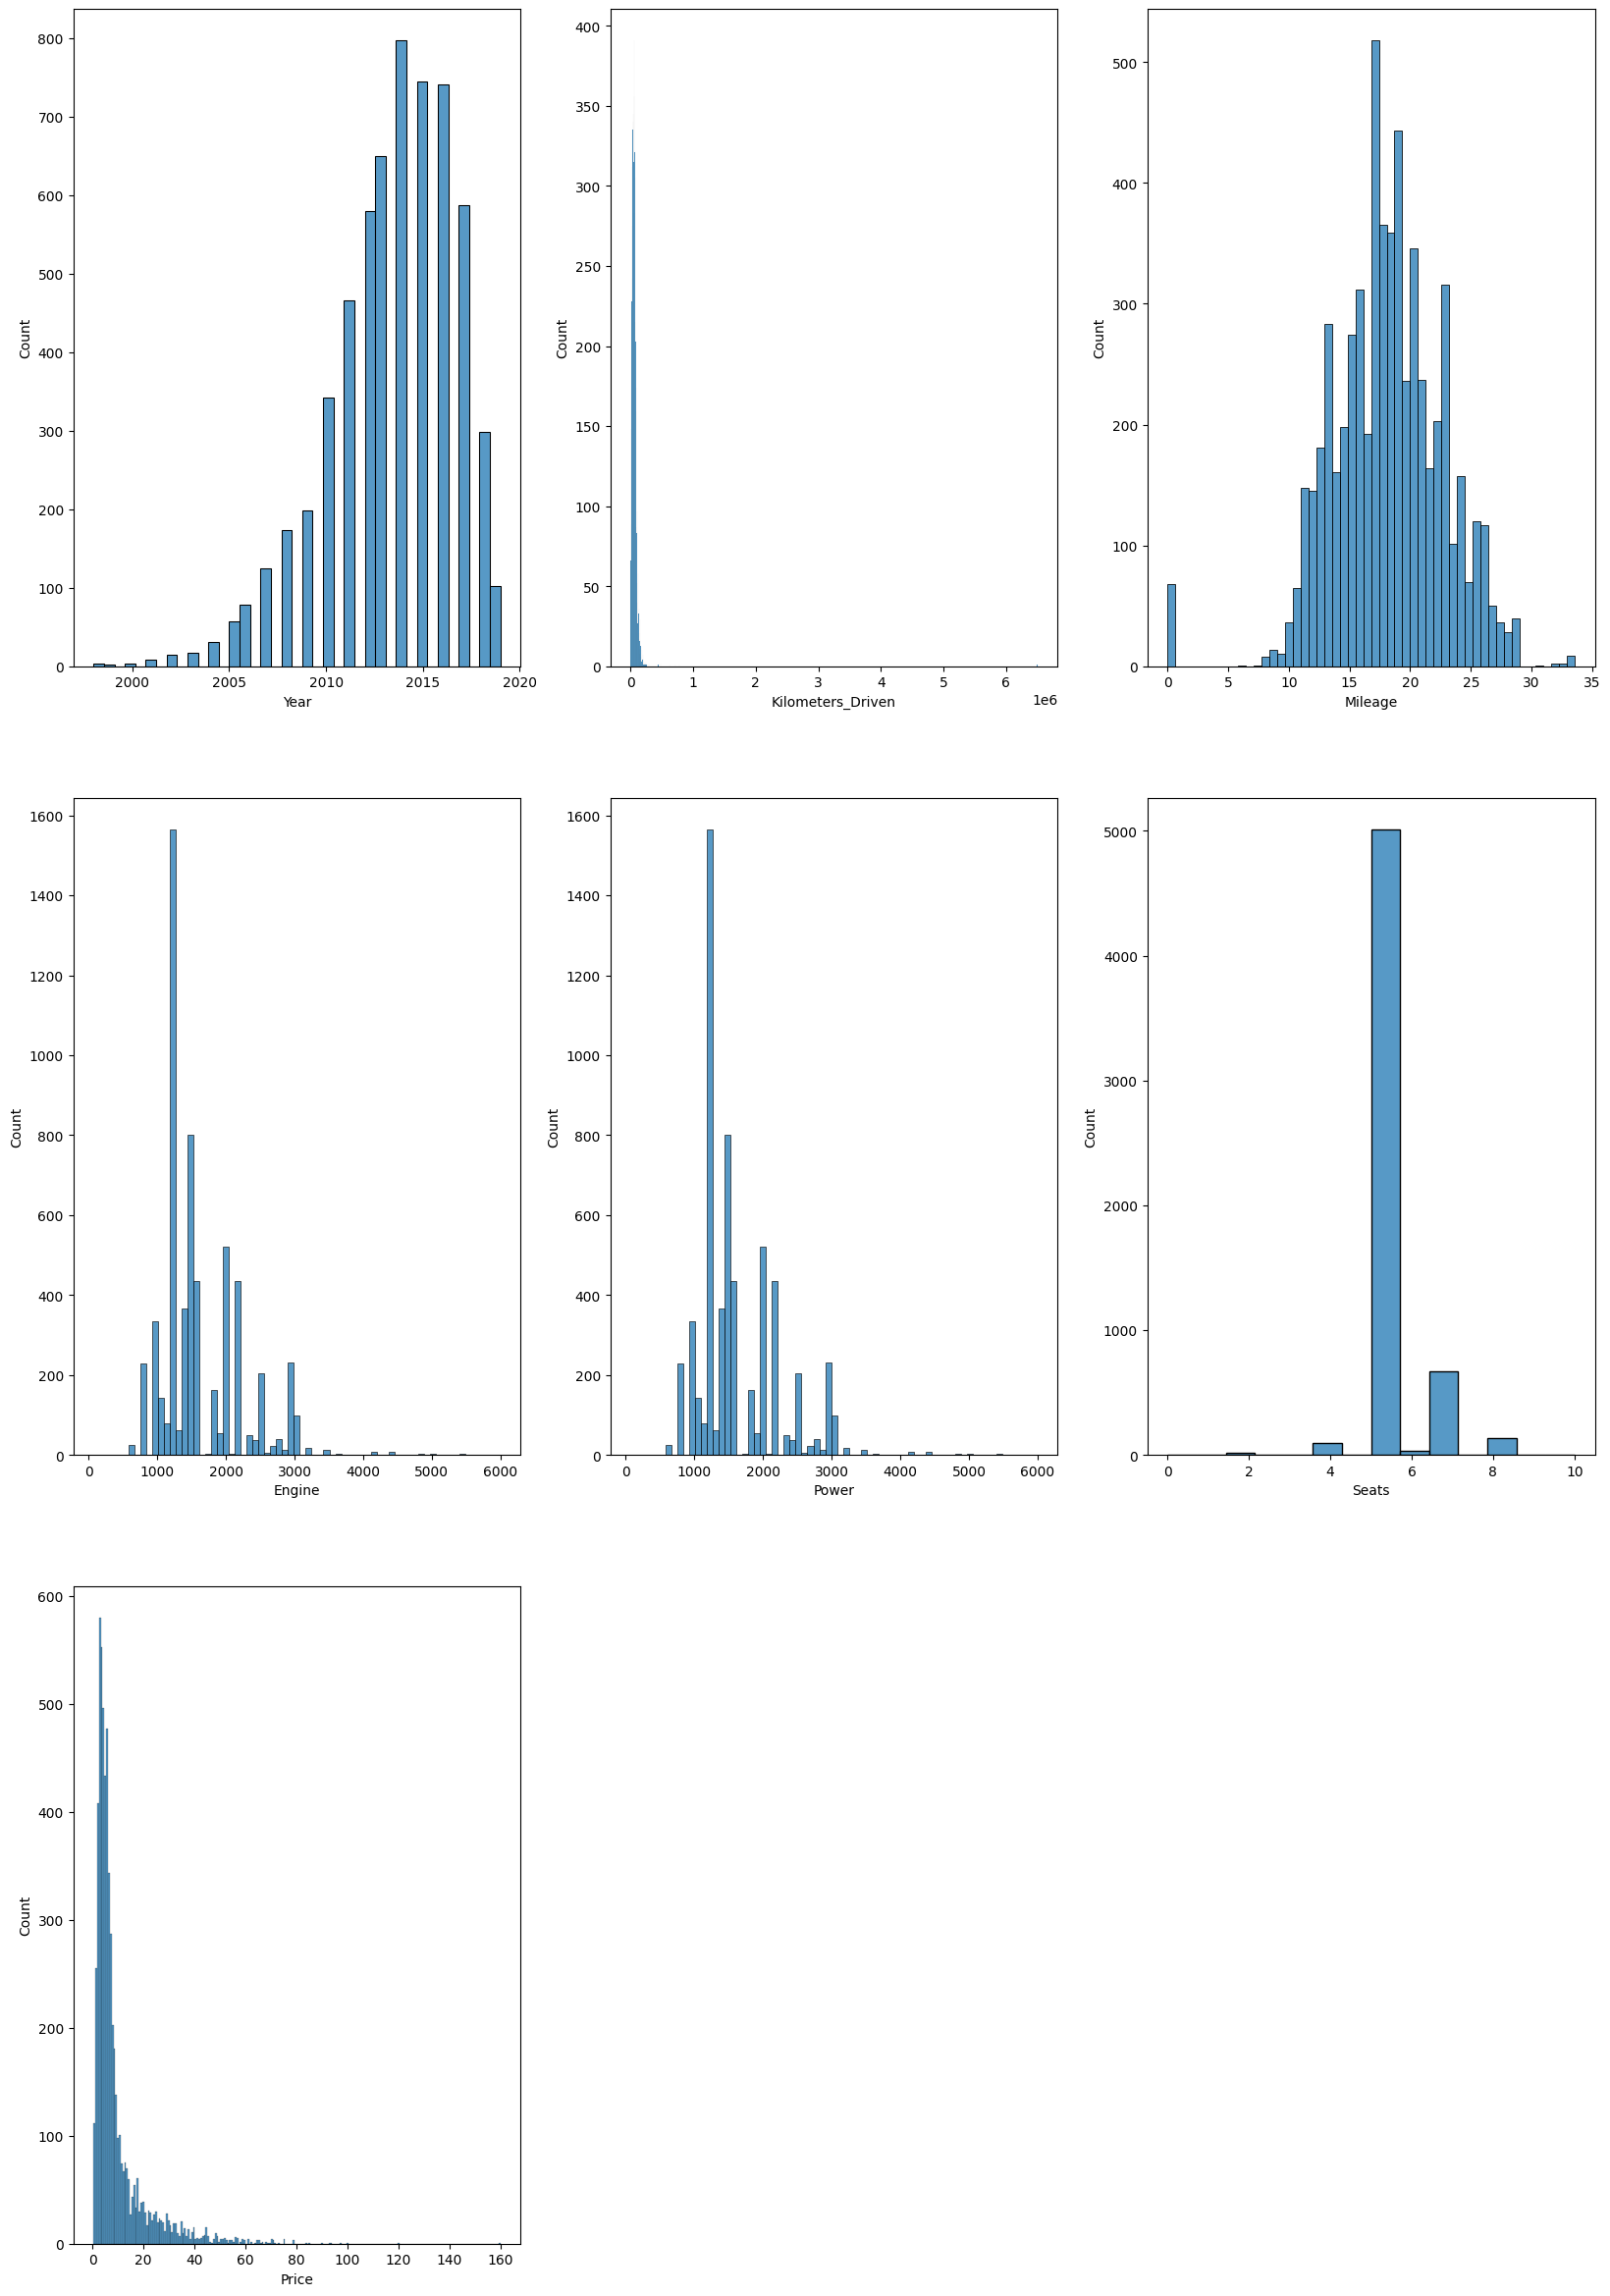

In [35]:
plt.figure(figsize = (20 , 40))
for i , col in enumerate (num_cols  ,1) :
    plt.subplot((len(num_cols)//2+1) , 3 , i )
    sns.histplot(data = df , x = col)

In [36]:
loc_price = df.groupby('Location')['Price'].mean().sort_values(ascending=False)
fig = px.bar(loc_price , color = loc_price.index )
fig.show()

In [37]:
fuel_price = df.groupby('Fuel_Type')['Price'].mean().sort_values(ascending=False)
fig = px.bar(fuel_price , color = fuel_price.index )
fig.show()

In [38]:
trans_price = df.groupby('Transmission')['Price'].mean().sort_values(ascending=False)
fig = px.bar(trans_price , color = trans_price.index )
fig.show()

In [39]:
owner_price = df.groupby('Owner_Type')['Price'].mean().sort_values(ascending=False)
fig = px.bar(owner_price , color = owner_price.index )
fig.show()

In [40]:
year_price = df.groupby('Year')['Price'].mean()
fig = px.bar(year_price , color = year_price.index )
fig.show()

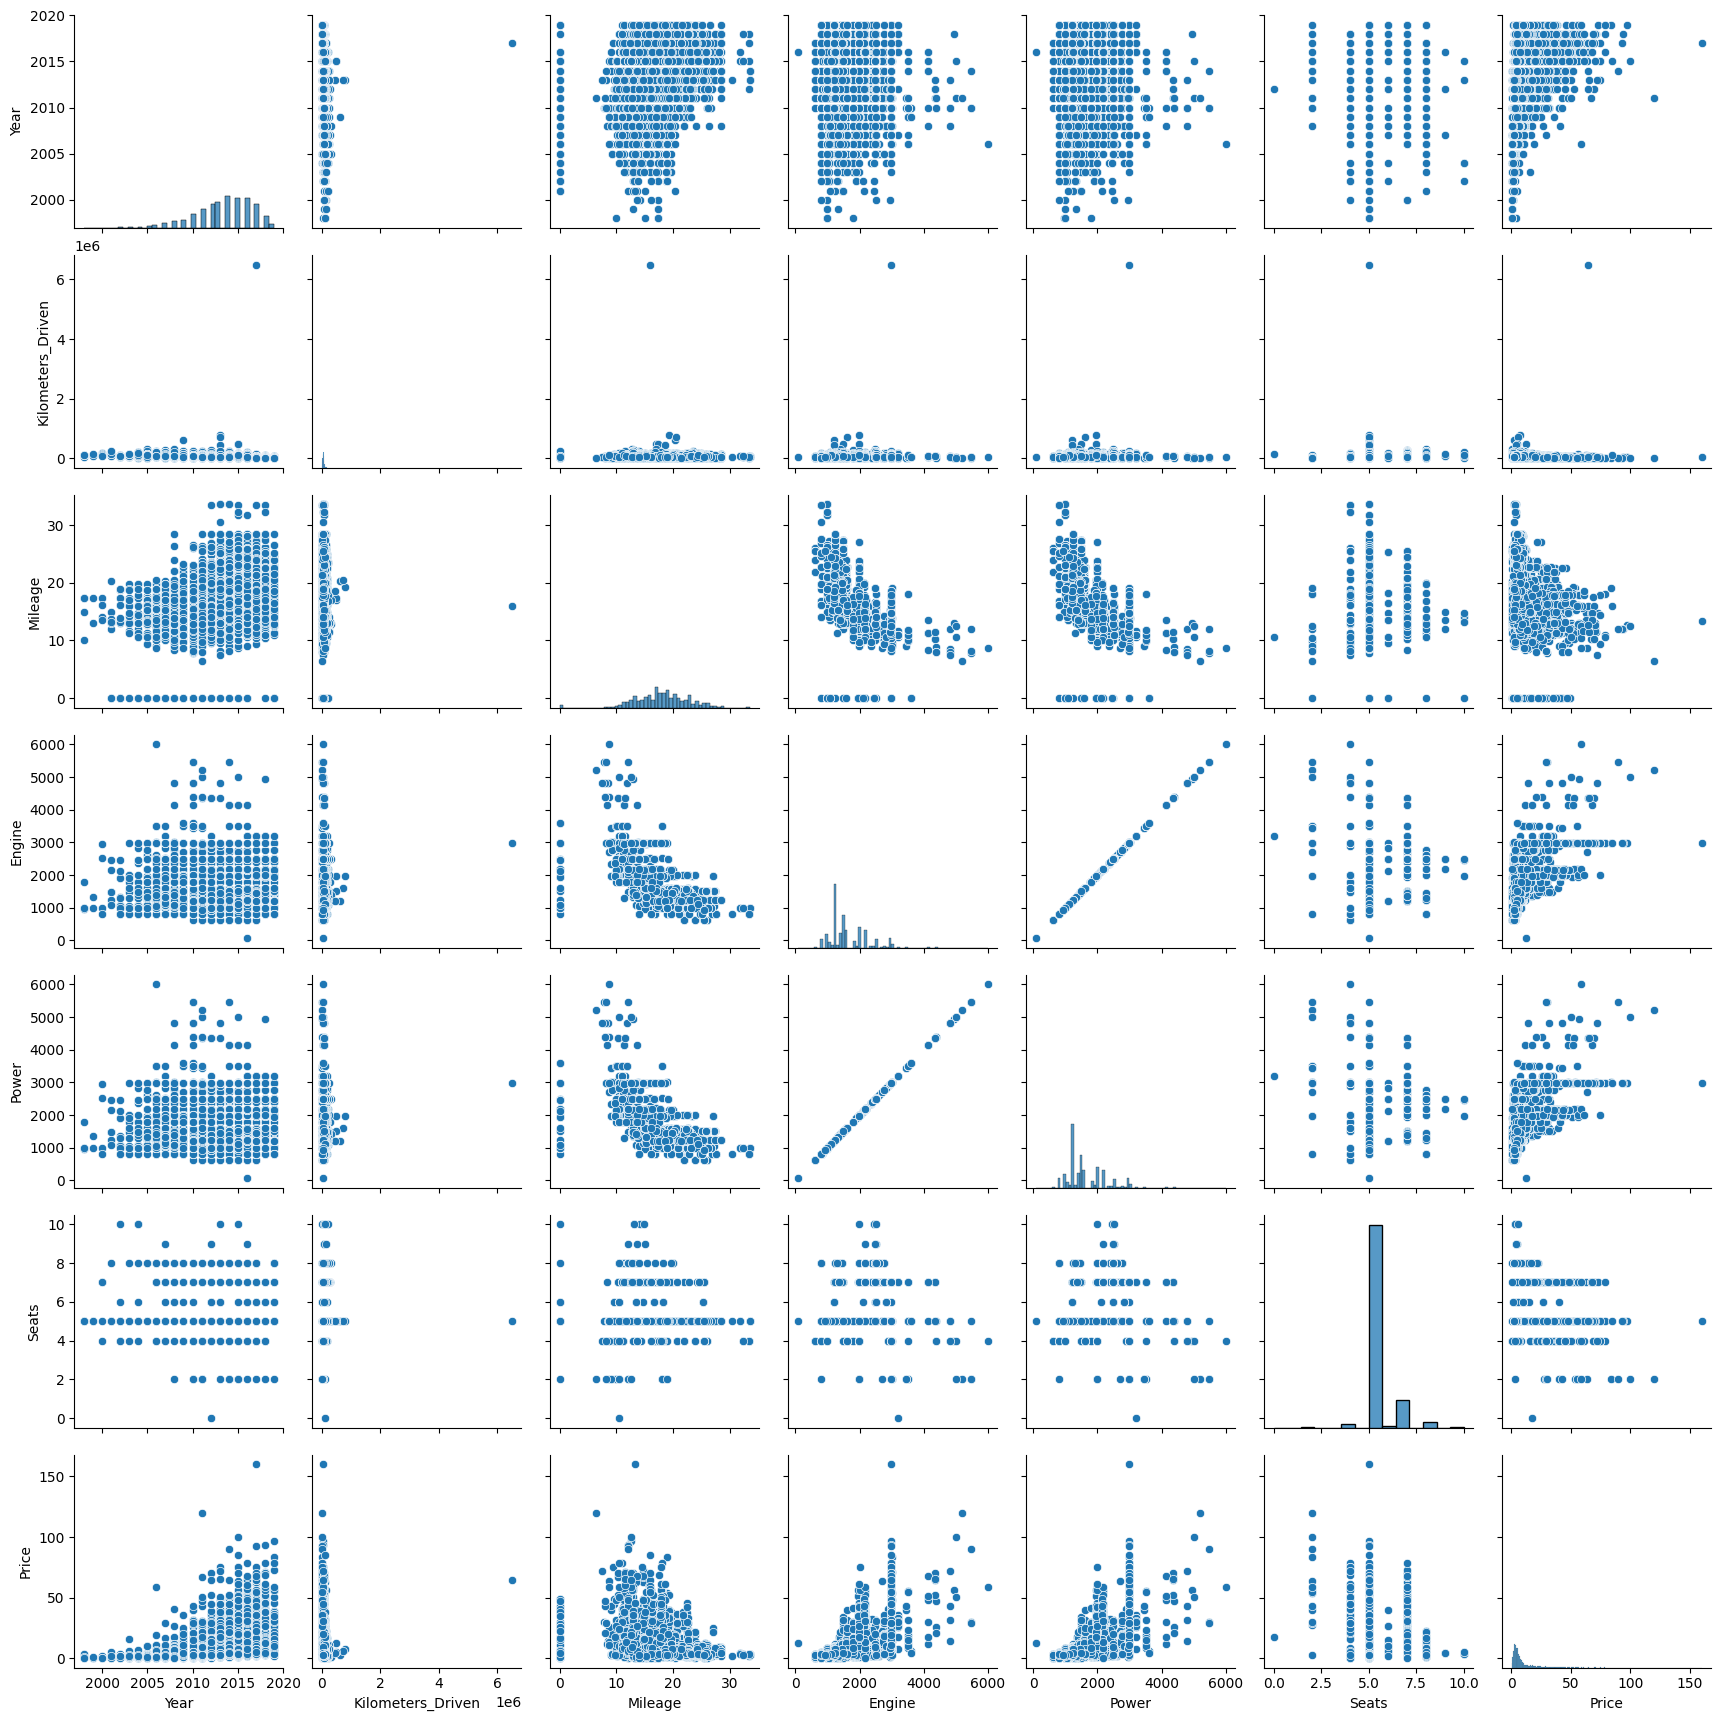

In [41]:
sns.pairplot(df );

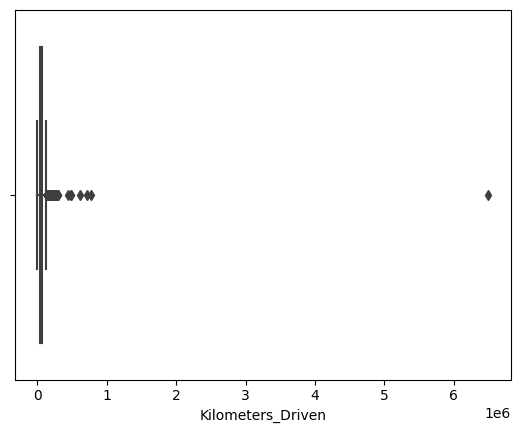

In [42]:
sns.boxplot( x='Kilometers_Driven', data=df);


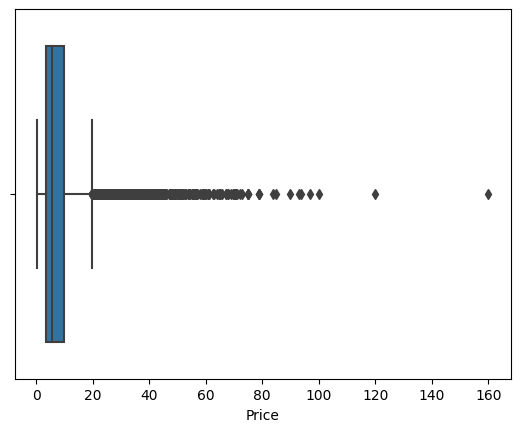

In [43]:
sns.boxplot( x='Price', data=df);

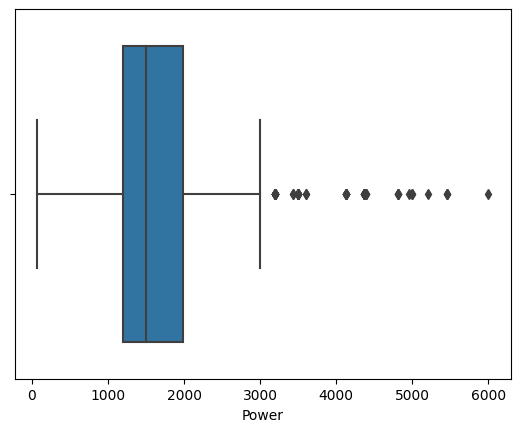

In [44]:
sns.boxplot( x='Power', data=df);


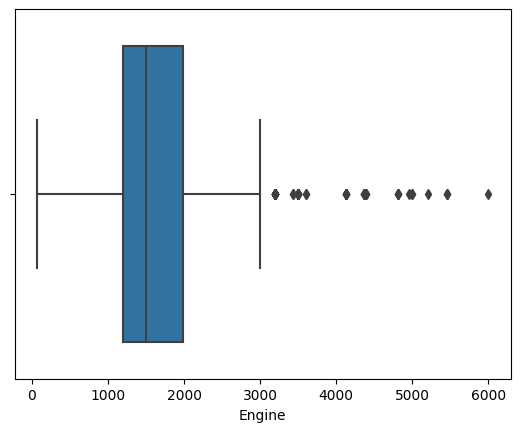

In [45]:
sns.boxplot( x='Engine', data=df);


In [46]:
df.drop(df[df['Kilometers_Driven'] > 100000].index, axis = 0, inplace = True)
df.drop(df[df['Price'] > 150].index, axis = 0, inplace = True)
df.drop(df[df['Power'] > 5000].index, axis = 0, inplace = True)
df.drop(df[df['Engine'] > 5000].index, axis = 0, inplace = True)

In [47]:
df.corr()['Price'].sort_values(ascending=False)

<ipython-input-47-8f67e87dca3b>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Price                1.000000
Engine               0.688936
Power                0.688936
Year                 0.305506
Seats                0.074302
Kilometers_Driven   -0.184014
Mileage             -0.323580
Name: Price, dtype: float64

<ipython-input-48-8df7bcac526d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

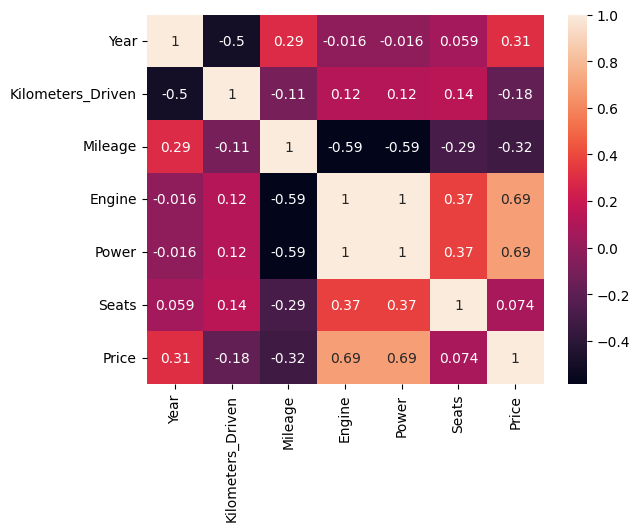

In [48]:
sns.heatmap(df.corr(),annot=True)

In [49]:
x_df = df.copy()
x_df.drop('Price', axis = 1, inplace = True)
x_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,998.0,5.0
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,1582.0,5.0
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,1199.0,5.0
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,1248.0,7.0
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,1968.0,5.0


In [50]:
z =df['Price']
z

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 5506, dtype: float64

In [51]:
x_df = pd.get_dummies(x_df, columns = ['Location', 'Fuel_Type','Transmission',"Owner_Type"])
x_df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,998.0,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,1582.0,5.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,1199.0,5.0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,1248.0,7.0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,1968.0,5.0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,1248.0,5.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
6015,2015,100000,24.40,1120.0,1120.0,5.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
6016,2012,55000,14.00,2498.0,2498.0,8.0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
6017,2013,46000,18.90,998.0,998.0,5.0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [52]:
df3 = pd.concat([x_df, z], axis=1)
df3.head(2)


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Price
0,2010,72000,26.60,998.0,998.0,5.0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1.75
1,2015,41000,19.67,1582.0,1582.0,5.0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,12.50


In [ ]:
from sklearn.impute import SimpleImputer
ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='mean')
ImputedX = ImputedModule.fit(df3)
df4 = ImputedX.transform(df3)
df4

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df4)
data = pd.DataFrame(scaled_data,
						columns=df3.columns)
data.head()


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Price
0,0.571429,0.011051,0.793083,0.156261,0.156261,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.008210
1,0.809524,0.006282,0.586464,0.254809,0.254809,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.075583
2,0.619048,0.007051,0.542636,0.190179,0.190179,0.5,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.025445
3,0.666667,0.013359,0.619261,0.198448,0.198448,0.7,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.034846
4,0.714286,0.006231,0.453190,0.319946,0.319946,0.5,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.108423


In [54]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Price
count,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,...,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,0.731343,0.009011,0.540697,0.261437,0.261437,0.527874,0.037215,0.059478,0.082073,0.105665,...,0.000332,0.001661,0.456222,0.285762,0.714238,0.818907,0.001495,0.160824,0.018774,0.056652
std,0.155702,0.014042,0.136599,0.101173,0.101173,0.080601,0.189305,0.236537,0.274499,0.307434,...,0.018227,0.040730,0.498121,0.451814,0.451814,0.385127,0.038643,0.367399,0.135737,0.070117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.619048,0.005205,0.452296,0.190010,0.190010,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.019178
50%,0.761905,0.008128,0.541145,0.239791,0.239791,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.032590
75%,0.857143,0.011205,0.629100,0.320115,0.320115,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.059601
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [380]:
X.shape

(6019, 28)

In [381]:
y.shape


(6019,)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [57]:
from sklearn.linear_model import LinearRegression

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = lr.predict(X_test)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))


RMSE: 0.04821508493113385
R2: 0.5965685437372266


In [58]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

# Predictions
y_pred = ridge.predict(X_test)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 0.04816124385034463
R2: 0.5974690526877042


In [59]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

# Predictions
y_pred = lasso.predict(X_test)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))
lasso.score(X_train, y_train)

RMSE: 0.07594487229709818
R2: -0.0009232975221096229


0.0

In [60]:
for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    print('alpha:', alpha)
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R2:', r2_score(y_test, y_pred))
    print('-----------------------------')

alpha: 0.001
RMSE: 0.048183095406727154
R2: 0.5971036998680179
-----------------------------
alpha: 0.01
RMSE: 0.04818258451725648
R2: 0.5971122437103978
-----------------------------
alpha: 0.1
RMSE: 0.04817797044263538
R2: 0.5971894029238862
-----------------------------
alpha: 1
RMSE: 0.04816124385034463
R2: 0.5974690526877042
-----------------------------
alpha: 10
RMSE: 0.04862772299933175
R2: 0.5896336381884677
-----------------------------
alpha: 100
RMSE: 0.0528676236462827
R2: 0.514953399590387
-----------------------------


In [61]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = make_pipeline(PolynomialFeatures(2), Ridge())
poly.fit(X_train, y_train)

# Predictions
y_pred = poly.predict(X_test)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))
print('R2:', poly.score(X_test, y_test))


RMSE: 0.03779268149939502
R2: 0.7521326631718119
R2: 0.7521326631718119


In [ ]:
for degree in [2, 3, 4, 5]:
    poly = make_pipeline(PolynomialFeatures(degree), Ridge())
    poly.fit(X_train, y_train)
    y_pred = poly.predict(X_test)
    print('degree:', degree)
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R2:', r2_score(y_test, y_pred))
    print('-----------------------------')

degree: 2
RMSE: 0.03779268149939502
R2: 0.7521326631718119
-----------------------------
degree: 3
RMSE: 0.036090102935290774
R2: 0.773962691602165
-----------------------------
degree: 4
RMSE: 0.035573264409411186
R2: 0.7803903971843238
-----------------------------


In [ ]:
def log_transform(x):
    return np.log(x)

# Log Transform
y_train_log = log_transform(y_train)
y_test_log = log_transform(y_test)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train_log)

